In [11]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [74]:
def load_clients(filename):

    with open(filename, 'rb') as fp:
        clients = pickle.load(fp)
    print("client size: ", len(clients))
    
    distribution = {}
    for client in clients:
        distribution[client] = distribution.get(client, 0) + 1

    distribution = sorted(distribution.items(), key=lambda x: -x[-1])
    x = np.array([i[0] for i in distribution])
    y = np.array([i[1] for i in distribution])
    print("distinct clients: ",len(x))
    print("var/client: ", np.var(y)/len(y))
    return x, y

In [85]:
def savefig_word_distribution(x, y, topk=50):
    x_top = x[:topk]
    y_top = y[:topk]
    total_clients = np.sum(y)
    with plt.style.context("seaborn"):
        plt.xticks(rotation=90)
        
        plt.xlabel("words")
        plt.ylabel("word_counts")
        plt.title("Words Count Distribution")
        plt.plot(x_top, y_top, '^-')
        plt.savefig(f"./clients_{total_clients}.png", format="png")


client size:  99411
distinct clients:  15742
var/client:  0.13729282674948987


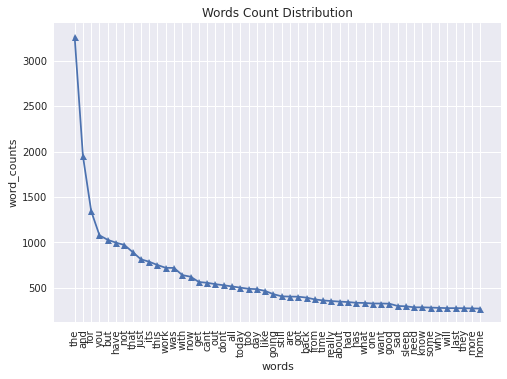

In [86]:
x, y = load_clients("./triehh_clients.txt")
savefig_word_distribution(x, y, topk=50)



client size:  9004
distinct clients:  3155
var/client:  0.014582004760547475


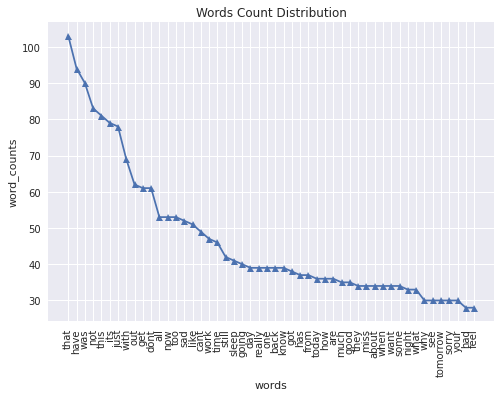

In [91]:
x, y = load_clients("./triehh_clients_remove_top5_9004.txt")
savefig_word_distribution(x, y, topk=50)

In [ ]:
removed_words = x[:5]
